In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
impimport matplotlib.pyplot as pltort plotly 
import plotly.express as px

In [2]:
df = pd.read_csv('Downloads/trump_tweets.csv')

In [3]:
df.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,1.698309e+09,Be sure to tune in and watch Donald Trump on L...,f,f,Twitter Web Client,939,519,5/4/2009 18:54,f
1,1.701461e+09,Donald Trump will be appearing on The View tom...,f,f,Twitter Web Client,259,34,5/5/2009 1:00,f
2,1.737480e+09,Donald Trump reads Top Ten Financial Tips on L...,f,f,Twitter Web Client,37,15,5/8/2009 13:38,f
3,1.741161e+09,New Blog Post: Celebrity Apprentice Finale and...,f,f,Twitter Web Client,29,11,5/8/2009 20:40,f
4,1.773561e+09,"""""""My persona will never be that of a wallflow...",f,f,Twitter Web Client,1877,1321,5/12/2009 14:07,f


In [4]:
df.isnull()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
56566,False,False,False,False,False,False,False,False,False
56567,False,False,False,False,False,False,False,False,False
56568,False,False,False,False,False,False,False,False,False
56569,False,False,False,False,False,False,False,False,False


In [5]:
df = df.drop(columns=['id'])

In [6]:
df.shape

(56571, 8)

In [7]:
df.columns 

Index(['text', 'isRetweet', 'isDeleted', 'device', 'favorites', 'retweets',
       'date', 'isFlagged'],
      dtype='object')

In [8]:
df.isFlagged.value_counts()

f    56267
t      304
Name: isFlagged, dtype: int64

In [9]:
df.isDeleted.value_counts()

f    55479
t     1092
Name: isDeleted, dtype: int64

In [10]:
df.describe()

,favorites,retweets
count,5.657100e+04,56571.000000
mean,2.834955e+04,8618.987467
std,5.781564e+04,13306.132408
min,0.000000e+00,0.000000
25%,1.000000e+01,59.000000
50%,1.640000e+02,3450.000000
75%,4.393850e+04,13014.500000
max,1.869706e+06,408866.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56571 entries, 0 to 56570
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       56571 non-null  object
 1   isRetweet  56571 non-null  object
 2   isDeleted  56571 non-null  object
 3   device     56571 non-null  object
 4   favorites  56571 non-null  int64 
 5   retweets   56571 non-null  int64 
 6   date       56571 non-null  object
 7   isFlagged  56571 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.5+ MB


In [12]:
# for working with timestamps
from datetime import datetime
from dateutil.parser import parse
dt = []
for ts in df.date:
  dt.append(parse(ts))
dt[:5]

[datetime.datetime(2009, 5, 4, 18, 54),
 datetime.datetime(2009, 5, 5, 1, 0),
 datetime.datetime(2009, 5, 8, 13, 38),
 datetime.datetime(2009, 5, 8, 20, 40),
 datetime.datetime(2009, 5, 12, 14, 7)]

In [13]:
df['datetime'] = df.apply(lambda row: parse(row.date), axis=1)

In [14]:
df.head()

,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,datetime
0,Be sure to tune in and watch Donald Trump on L...,f,f,Twitter Web Client,939,519,5/4/2009 18:54,f,2009-05-04 18:54:00
1,Donald Trump will be appearing on The View tom...,f,f,Twitter Web Client,259,34,5/5/2009 1:00,f,2009-05-05 01:00:00
2,Donald Trump reads Top Ten Financial Tips on L...,f,f,Twitter Web Client,37,15,5/8/2009 13:38,f,2009-05-08 13:38:00
3,New Blog Post: Celebrity Apprentice Finale and...,f,f,Twitter Web Client,29,11,5/8/2009 20:40,f,2009-05-08 20:40:00
4,"""""""My persona will never be that of a wallflow...",f,f,Twitter Web Client,1877,1321,5/12/2009 14:07,f,2009-05-12 14:07:00


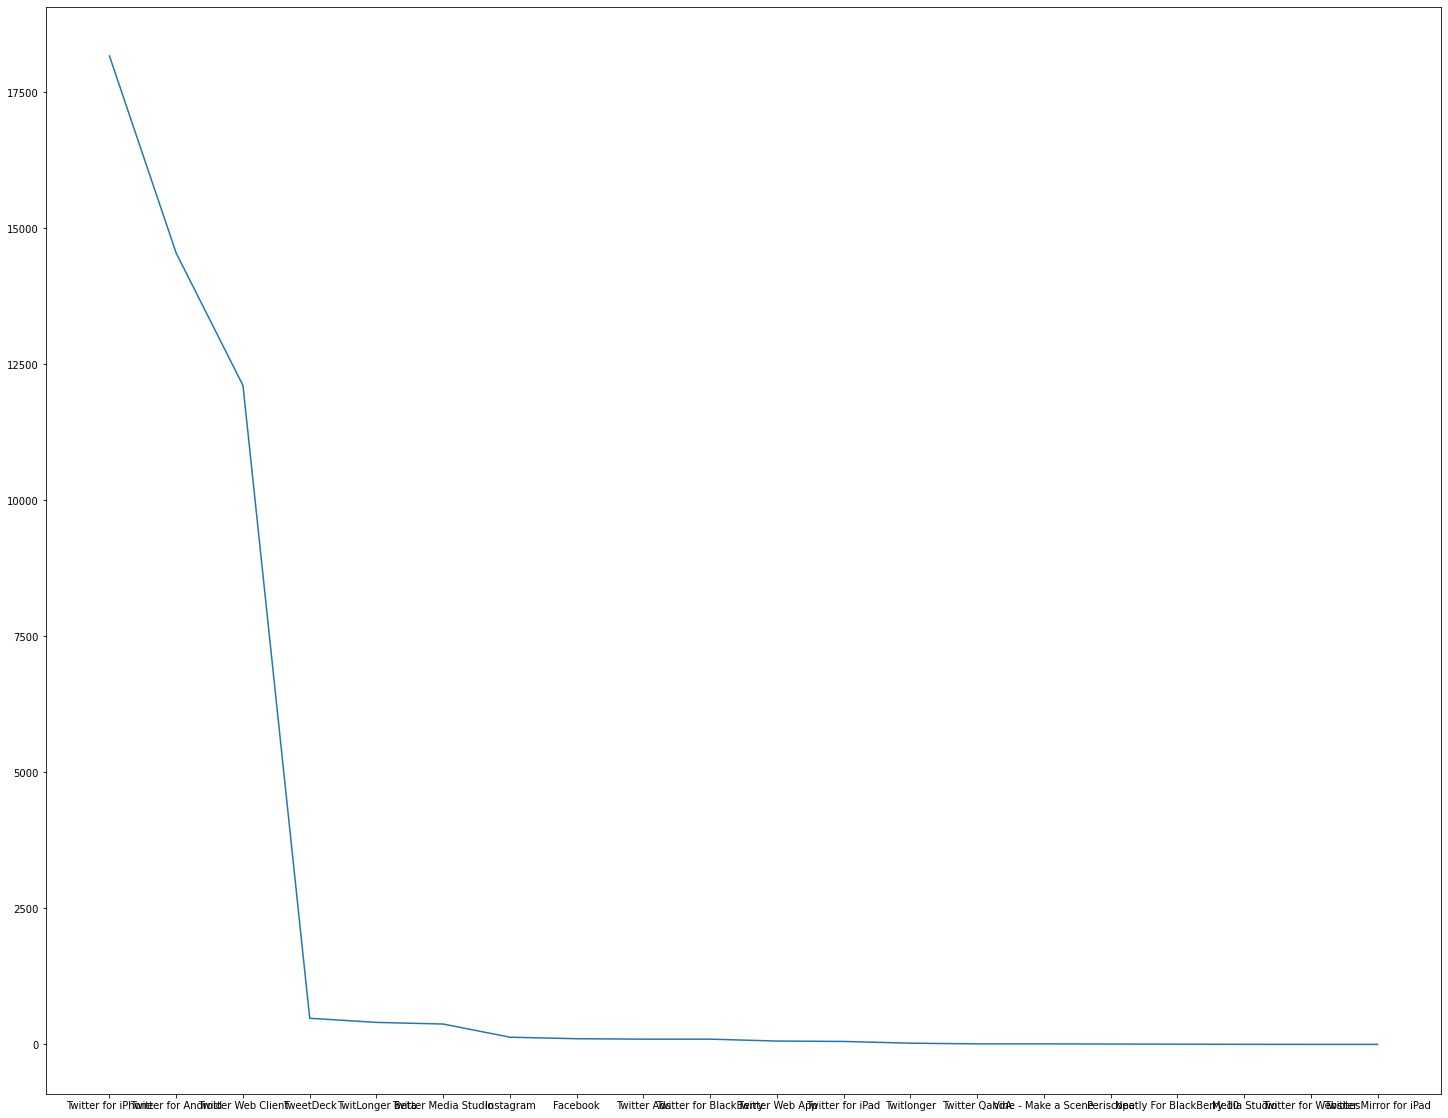

In [63]:
plt.figure(figsize=(25, 20))
plt.plot(df.device.value_counts())

In [15]:
df.device.value_counts()

Twitter for iPhone          27967
Twitter for Android         14545
Twitter Web Client          12182
TweetDeck                     482
TwitLonger Beta               405
Twitter Media Studio          375
Instagram                     133
Facebook                      105
Twitter Ads                    97
Twitter for BlackBerry         97
Twitter Web App                64
Twitter for iPad               60
Twitlonger                     23
Twitter QandA                  10
Vine - Make a Scene            10
Periscope                       7
Neatly For BlackBerry 10        5
Media Studio                    2
Twitter for Websites            1
Twitter Mirror for iPad         1
Name: device, dtype: int64

In [16]:
# dropping the date column as i have already created a datetime 
df = df.drop(columns=['date'])

In [17]:
df.head()

,text,isRetweet,isDeleted,device,favorites,retweets,isFlagged,datetime
0,Be sure to tune in and watch Donald Trump on L...,f,f,Twitter Web Client,939,519,f,2009-05-04 18:54:00
1,Donald Trump will be appearing on The View tom...,f,f,Twitter Web Client,259,34,f,2009-05-05 01:00:00
2,Donald Trump reads Top Ten Financial Tips on L...,f,f,Twitter Web Client,37,15,f,2009-05-08 13:38:00
3,New Blog Post: Celebrity Apprentice Finale and...,f,f,Twitter Web Client,29,11,f,2009-05-08 20:40:00
4,"""""""My persona will never be that of a wallflow...",f,f,Twitter Web Client,1877,1321,f,2009-05-12 14:07:00


In [18]:
df.isRetweet.value_counts()

f    46694
t     9877
Name: isRetweet, dtype: int64

In [19]:
Retweet = df[df.isRetweet == 't']

In [20]:
Retweet.shape

(9877, 8)

In [21]:
df = df.loc[df.isRetweet == 'f']
df = df.drop(columns=['isRetweet'])

In [ ]:
# df.head()

In [23]:
df.shape

(46694, 7)

# Retweet

Text(0, 0.5, 'tweets count')

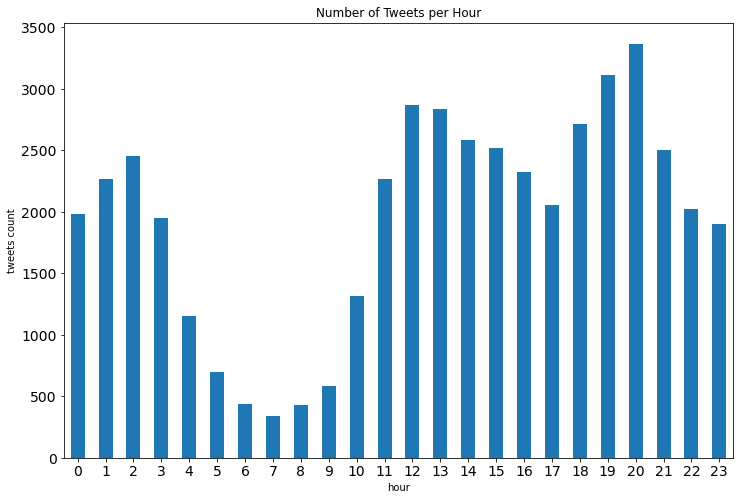

In [25]:
title = 'Number of Tweets per Hour'
df.text.groupby(df.datetime.dt.hour).count().plot(figsize=(12,8), fontsize=14, kind='bar', rot=0, title=title)
plt.xlabel('hour')
plt.ylabel('tweets count')

([<matplotlib.axis.XTick at 0x297570c2be0>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

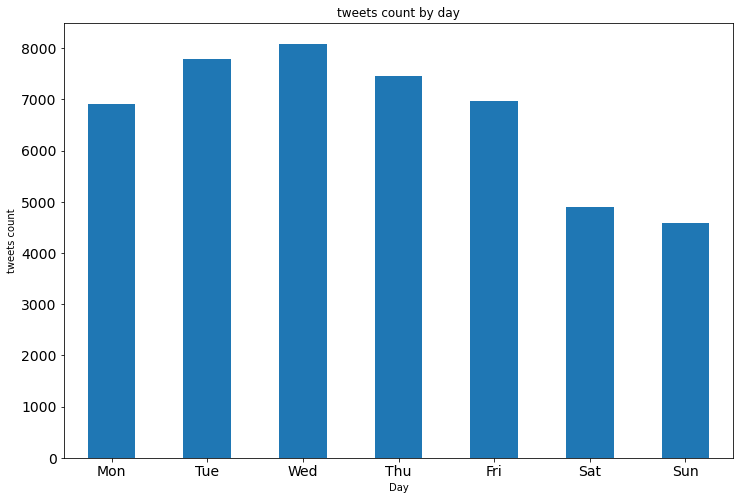

In [26]:
title = 'tweets count by day'
df.text.groupby(df.datetime.dt.dayofweek).count().plot(figsize=(12,8), fontsize=14, kind='bar', rot=0, title=title)
plt.xlabel('Day')
plt.ylabel('tweets count')
plt.xticks(np.arange(7),['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Favourite

In [36]:
print('Total favorites: ', df['favorites'].sum())

Total favorites:  1603761861


In [37]:
fig=px.line(df, x='datetime', y='favorites', title='Favorites tweets rise')
fig['data'][0]['line']['color']='Red'
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [38]:
import re

In [43]:
Retweet.head()

,text,isRetweet,isDeleted,device,favorites,retweets,isFlagged,datetime,original
806,RT @Newsmax_Media: Trumps Warns of Obama Tippi...,t,f,TweetDeck,10,41,f,2011-12-05 22:10:00,Newsmax_Media
1275,RT @accesshollywood: @realDonald Trump: 'Celeb...,t,f,Twitter Web Client,4,20,f,2012-02-16 20:30:00,accesshollywood
1314,RT @OCChoppers: Bike we built for @realDonaldT...,t,f,Twitter Web Client,220,127,f,2012-02-23 19:36:00,OCChoppers
2423,RT @IBDeditorials: Was Barack Obama A Foreign ...,t,f,Twitter Web Client,26,150,f,2012-08-10 19:06:00,IBDeditorials
2799,"RT @MittRomney: For nearly 4 years, Barack Oba...",t,f,Twitter Web Client,25,123,f,2012-09-14 18:40:00,MittRomney


In [39]:
pattern = re.compile('(?<=RT @).*?(?=:)')
Retweet['original'] = [re.search(pattern, text).group(0) for text in Retweet.text]

In [44]:
originals = Retweet.groupby(['original']).sum().sort_values('retweets').reset_index().sort_values('retweets', ascending=False)

In [45]:
originals.head()
originals.shape

(1749, 3)

([], [])

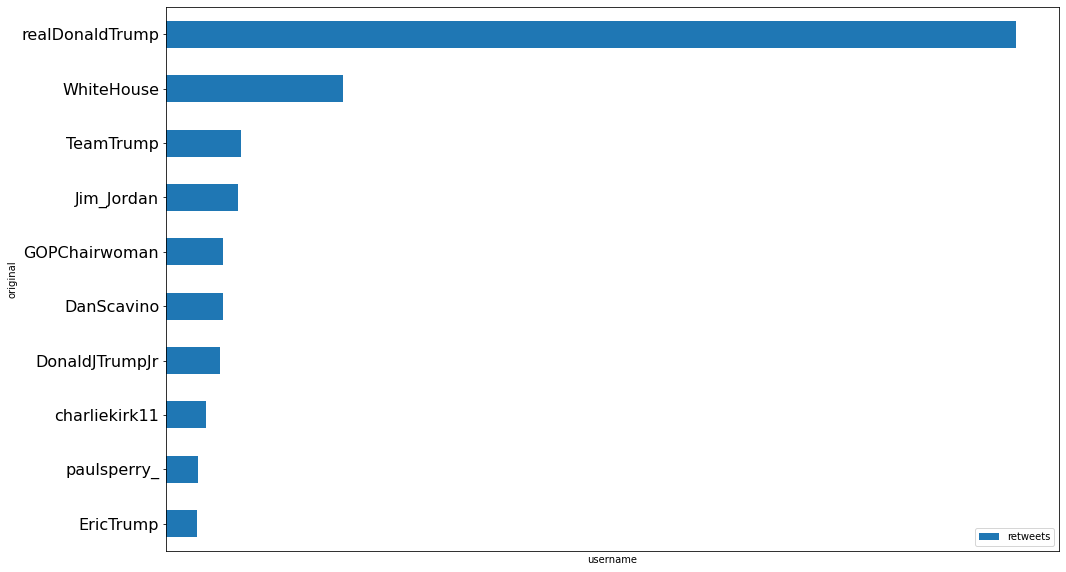

In [49]:
originals = Retweet.groupby(['original']).sum().sort_values('retweets').reset_index().sort_values('retweets', ascending=False)[:10].sort_values('retweets')
originals.plot.barh(x='original', y='retweets', figsize=(16,10), fontsize=16)
plt.xlabel("username")
plt.xticks([])

In [48]:
Retweet.loc[Retweet.original == 'realDonaldTrump'].sort_values('retweets', ascending=False)[:5]

,text,isRetweet,isDeleted,device,favorites,retweets,isFlagged,datetime,original
48972,RT @realDonaldTrump: The United States of Amer...,t,f,Twitter for iPhone,0,210614,f,2020-05-31 22:52:00,realDonaldTrump
39429,RT @realDonaldTrump: Just spoke to @KanyeWest ...,t,f,Twitter for iPhone,0,179571,f,2019-07-20 11:02:00,realDonaldTrump
43358,RT @realDonaldTrump: https://t.co/11nzKwOCtU,t,f,Twitter for iPhone,0,177969,f,2019-12-09 04:59:00,realDonaldTrump
55210,RT @realDonaldTrump: WE WILL WIN!,t,f,Twitter for iPhone,0,164813,f,2020-11-11 04:04:00,realDonaldTrump
56304,RT @realDonaldTrump: https://t.co/v9Rdjz6DNu,t,f,Twitter for iPhone,0,163432,f,2020-12-23 05:26:00,realDonaldTrump


In [2]:
from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

In [3]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

In [4]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', 
                      colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(Retweet)
plot_cloud(wordcloud)

NameError: name 'WordCloud' is not defined